<a href="https://colab.research.google.com/github/PrincetonUniversity/python_machine_learning/blob/main/notebook3_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(1)
qualitiative_colors = ['#1b9e77','#d95f02','#7570b3','#e7298a']

# Clustering

## Make Clustering Data Set

In [2]:
from sklearn.datasets import make_circles, make_moons, make_blobs

n_samples = 500
noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)
blobs = make_blobs(n_samples=n_samples, random_state=8)

random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

no_structure = np.random.rand(n_samples, 2), np.zeros(n_samples)

datasets = [(varied,       {"n_clusters": 3}),
            (aniso,        {"n_clusters": 3}),
            (blobs,        {"n_clusters": 3}),
            (noisy_circles,{"n_clusters": 2}),
            (noisy_moons,  {"n_clusters": 2}),
            (no_structure, {"n_clusters": 3}),
           ]

Text(0, 0.5, '$x_2$')

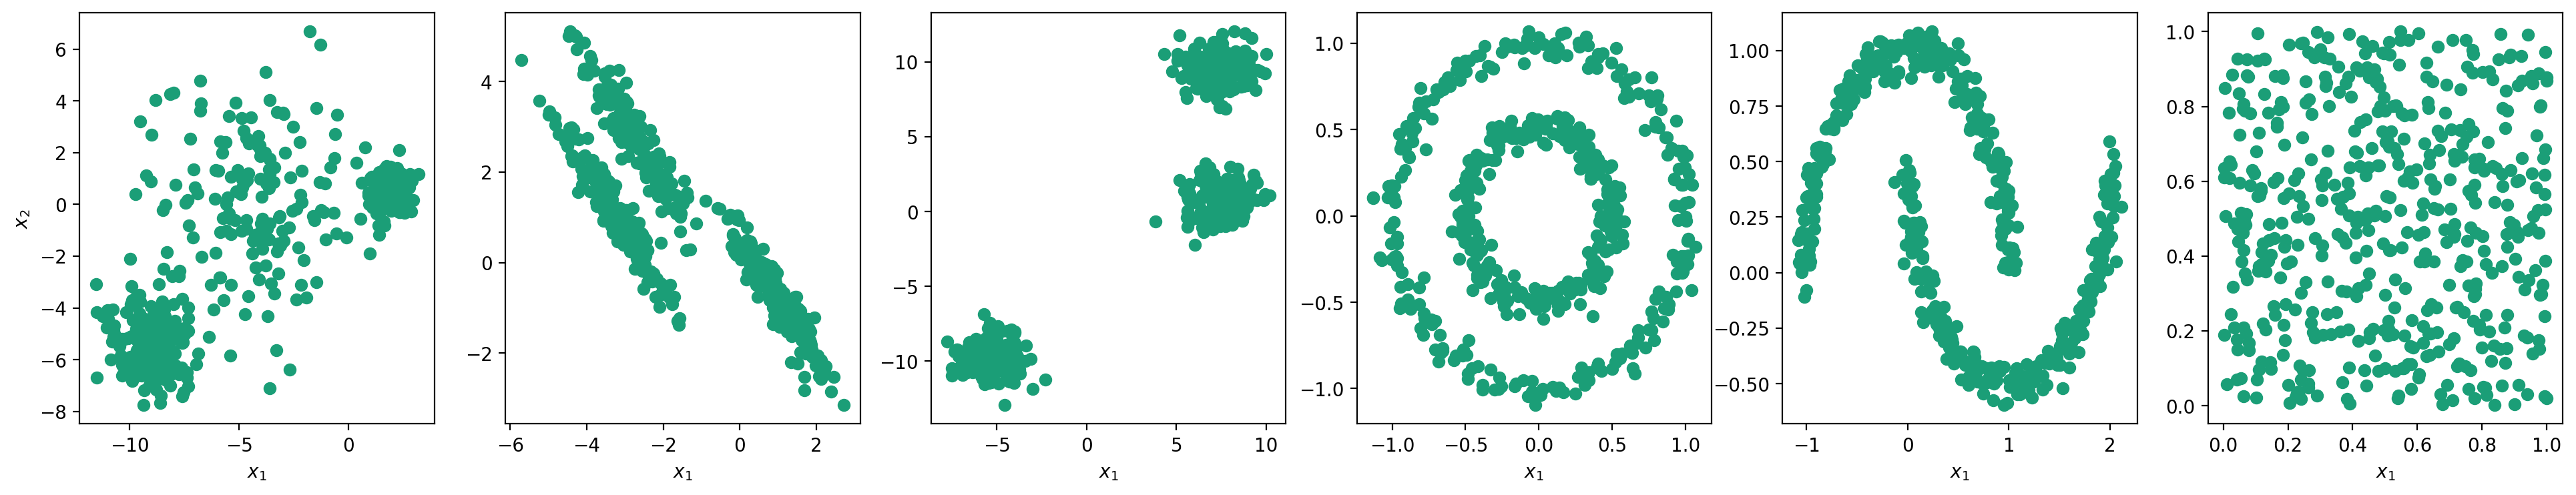

In [3]:
fig, axs = plt.subplots(figsize=(24.,4.), nrows=1, ncols=6, facecolor='white', dpi=200)
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    X, y = dataset
    axs[i_dataset].scatter(X[:,0], X[:,1], c=qualitiative_colors[0])
    axs[i_dataset].set_xlabel(r'$x_1$')
axs[0].set_ylabel(r'$x_2$')

## K-Means clustering

In [4]:
from sklearn.cluster import KMeans

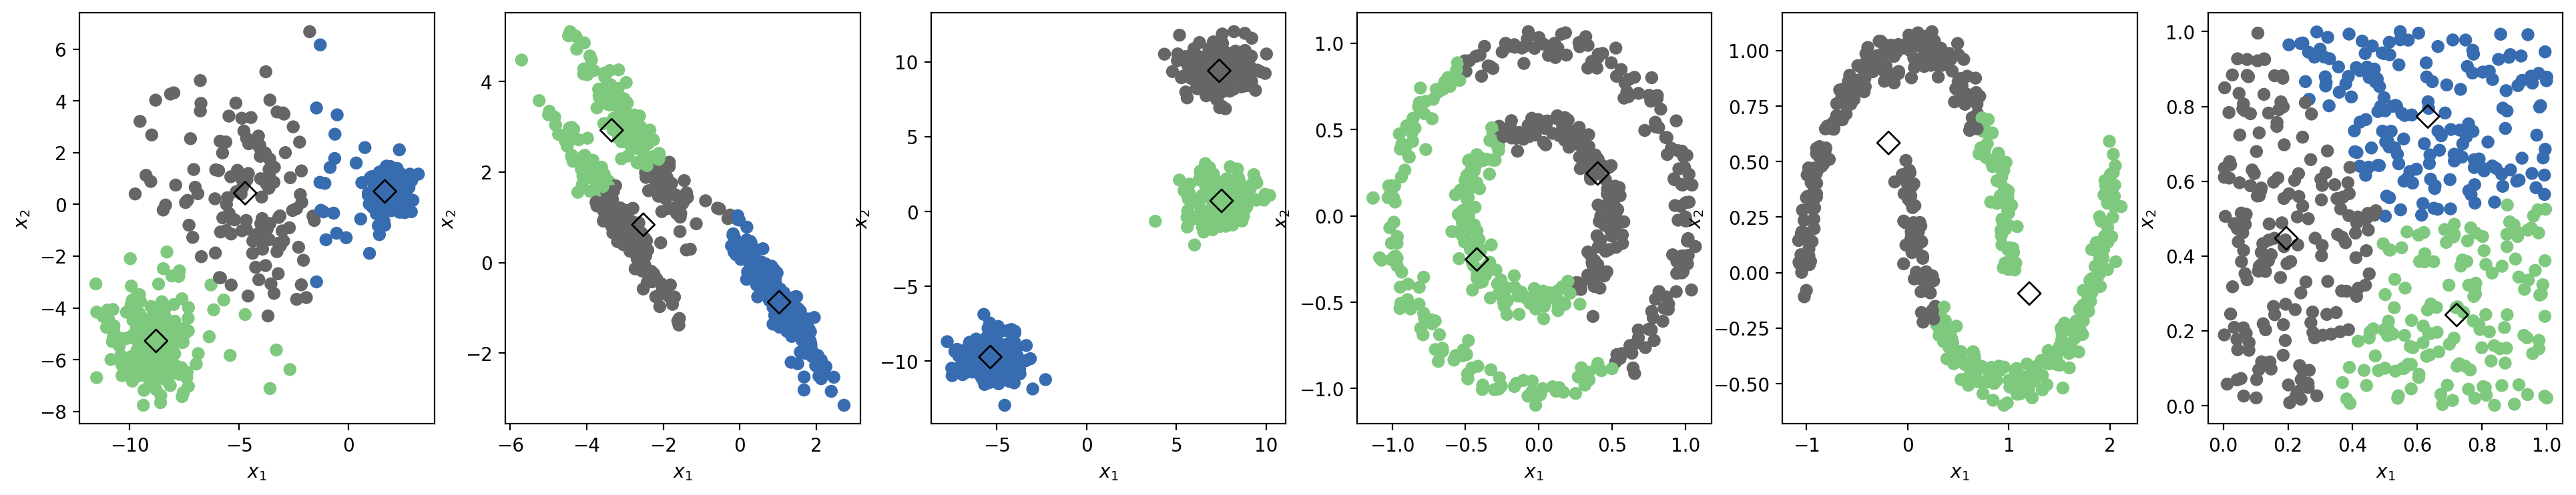

In [5]:
fig, axs = plt.subplots(figsize=(24.,4.), nrows=1, ncols=6, facecolor='white', dpi=200)
for i_dataset, (dataset, algo_params) in enumerate(datasets):
    X, y = dataset
    
    # Create K-Means clustering object
    k_means = KMeans(init="k-means++", n_clusters=algo_params['n_clusters'], n_init=10)
    
    # Train the model using the training set
    k_means.fit(X)
    
    # Return the cluster centroids
    k_means_cluster_centers = k_means.cluster_centers_
    
    # Return the cluster assignments
    y_prediction = k_means.labels_

    axs[i_dataset].scatter(X[:,0], X[:,1], c=y_prediction, cmap=plt.cm.Accent)
    axs[i_dataset].scatter(k_means_cluster_centers[:,0], k_means_cluster_centers[:,1], c='None', marker="D", edgecolors='k', s=75)
    axs[i_dataset].set_ylabel(r'$x_2$')
    axs[i_dataset].set_xlabel(r'$x_1$')